In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/data_science_job.csv")

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [ ]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.358311
gender,23.022062
relevent_experience,0.000000
enrolled_university,1.987448
education_level,2.367820
major_discipline,14.910612
experience,0.285280
company_size,31.114492


In [ ]:
df.shape

(10516, 13)

In [ ]:
cols = [var for var in df.columns if df[var].isnull().mean() <0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours',
 'target']

In [ ]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours,target
7634,0.920,Full time course,Masters,20.0,12.0,0.0
4762,0.920,no_enrollment,NaN,9.0,13.0,0.0
2795,0.550,no_enrollment,Graduate,5.0,87.0,1.0
3475,0.740,Part time course,Graduate,14.0,12.0,0.0
8767,0.887,Part time course,Graduate,3.0,158.0,0.0


In [ ]:
len(df[cols].dropna())/len(df)

0.8954925827310765

In [ ]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((10516, 13), (9417, 6))

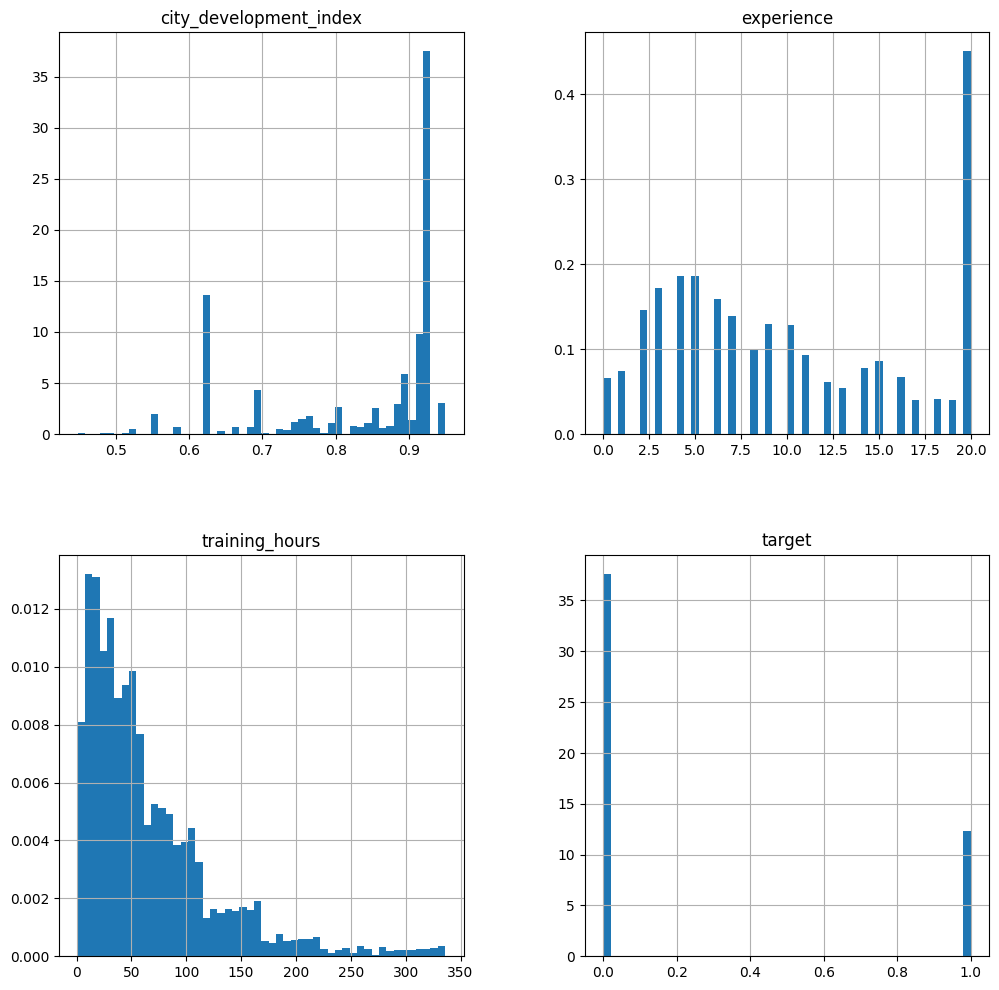

In [ ]:
new_df.hist(bins=50,density=True, figsize=(12,12))
plt.show()

<Axes: >

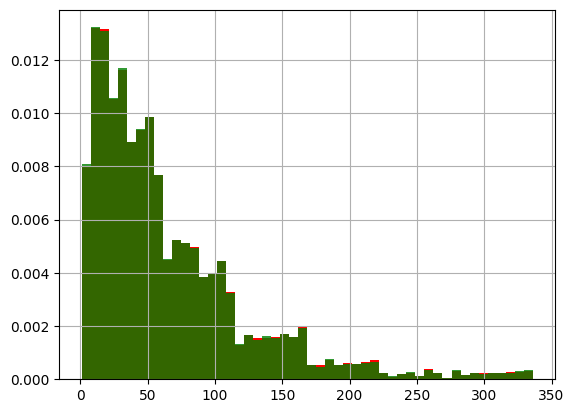

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
df['training_hours'].hist(bins=50,ax=ax,density=True,color='red')

# data after cca, the argument aplha makes the color transparent, so we can
# see the overlay of the 2 distribution
new_df['training_hours'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

<Axes: ylabel='Density'>

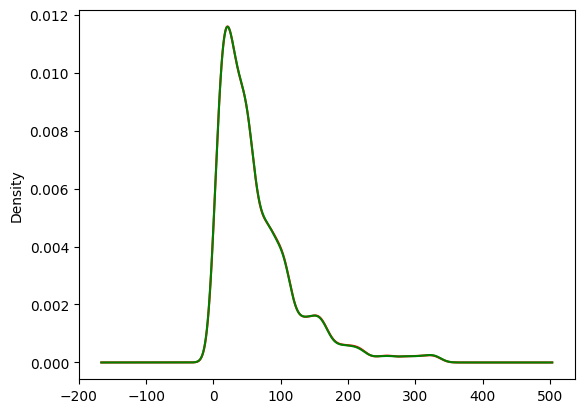

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<Axes: >

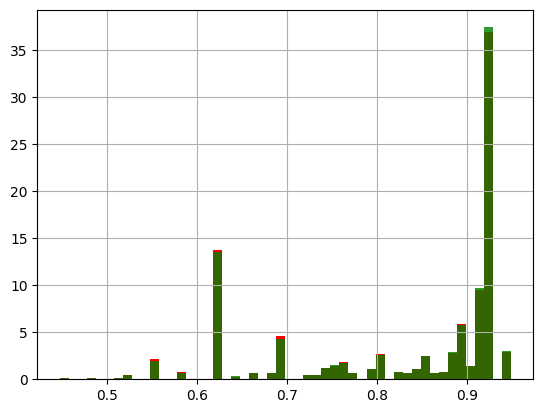

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
df['city_development_index'].hist(bins=50,density=True,color='red',ax=ax)


# data after cca, the argument aplha makes the color transparent, so we can
# see the overlay of the 2 distribution
new_df['city_development_index'].hist(bins=50,density=True,ax=ax,color='green',alpha=0.8)

<Axes: ylabel='Density'>

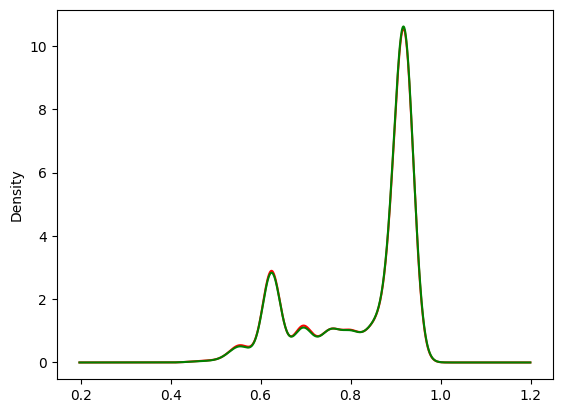

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<Axes: >

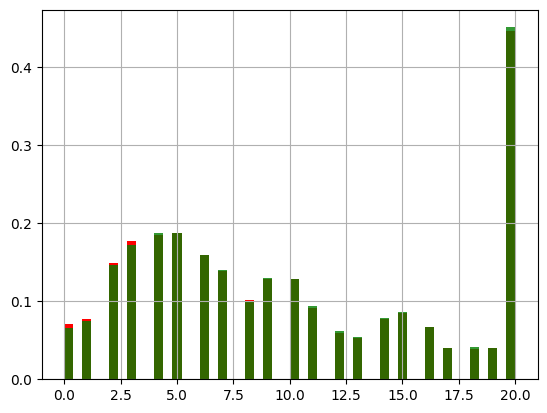

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
df['experience'].hist(bins=50,density=True,color='red',ax=ax)


# data after cca, the argument aplha makes the color transparent, so we can
# see the overlay of the 2 distribution
new_df['experience'].hist(bins=50,density=True,ax=ax,color='green',alpha=0.8)

<Axes: ylabel='Density'>

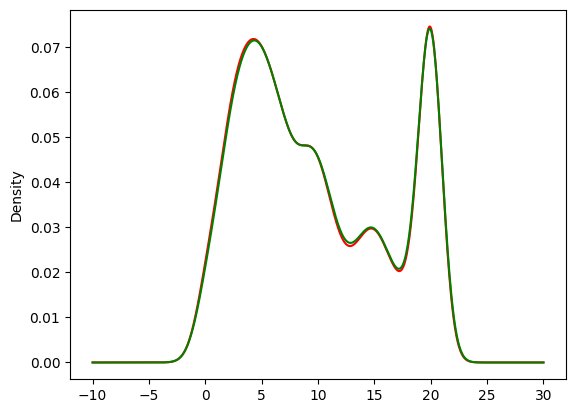

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [ ]:
temp = pd.concat([
    # percentage of observations per category, original data
    df['enrolled_university'].value_counts()/len(df),

    # percentage of obseration per categegory, cca data
    new_df['enrolled_university'].value_counts()/len(new_df)
],axis=1)


# add column names
temp.columns = ['original','cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.719380,0.732930
Full time course,0.199220,0.203993
Part time course,0.061525,0.063077


In [ ]:
temp = pd.concat([
    # percentage of observations per category, original data
    df['education_level'].value_counts()/len(df),

    # percentage of obseration per categegory, cca data
    new_df['education_level'].value_counts()/len(new_df)
],axis=1)


# add column names
temp.columns = ['original','cca']

temp

,original,cca
education_level,,
Graduate,0.602891,0.617500
Masters,0.227178,0.232983
High School,0.107931,0.110120
Phd,0.021871,0.022300
Primary School,0.016451,0.017097
